In [ ]:
import numpy as np
import random

class AntColony:
    def __init__(self, cities, num_ants=10, alpha=1.0, beta=2.0, rho=0.5, iterations=100):
        self.cities = cities
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.iterations = iterations
        self.num_cities = len(cities)
        self.pheromone = np.ones((self.num_cities, self.num_cities))
        self.distance = self.calculate_distances()

    def calculate_distances(self):
        distances = np.zeros((self.num_cities, self.num_cities))
        for i in range(self.num_cities):
            for j in range(i + 1, self.num_cities):
                distances[i][j] = distances[j][i] = np.linalg.norm(np.array(self.cities[i]) - np.array(self.cities[j]))
        return distances

    def select_next_city(self, current_city, visited):
        probabilities = []
        for next_city in range(self.num_cities):
            if next_city not in visited:
                pheromone = self.pheromone[current_city][next_city] ** self.alpha
                heuristic = (1 / self.distance[current_city][next_city]) ** self.beta
                probabilities.append(pheromone * heuristic)
            else:
                probabilities.append(0)

        total = sum(probabilities)
        probabilities = [p / total for p in probabilities]
        return np.random.choice(range(self.num_cities), p=probabilities)

    def construct_solution(self):
        for _ in range(self.num_ants):
            visited = [0]
            current_city = 0
            for _ in range(1, self.num_cities):
                next_city = self.select_next_city(current_city, visited)
                visited.append(next_city)
                current_city = next_city
            visited.append(0)  # Return to starting city
            yield visited

    def update_pheromones(self, solutions):
        self.pheromone *= (1 - self.rho)  # Evaporation
        for solution in solutions:
            length = self.calculate_tour_length(solution)
            pheromone_deposit = 1 / length
            for i in range(len(solution) - 1):
                self.pheromone[solution[i]][solution[i + 1]] += pheromone_deposit

    def calculate_tour_length(self, solution):
        return sum(self.distance[solution[i]][solution[i + 1]] for i in range(len(solution) - 1))

    def run(self):
        best_solution = None
        best_length = float('inf')

        for _ in range(self.iterations):
            solutions = list(self.construct_solution())
            self.update_pheromones(solutions)

            for solution in solutions:
                length = self.calculate_tour_length(solution)
                if length < best_length:
                    best_length = length
                    best_solution = solution

        return best_solution, best_length


# Define the cities as (x, y) coordinates
cities = [(0, 0), (1, 2), (2, 1), (4, 4), (2, 4)]

# Create an Ant Colony optimizer
aco = AntColony(cities)

# Run the ACO algorithm
best_route, best_distance = aco.run()

# Output the best solution
print("Best Route:", best_route)
print("Best Distance:", best_distance)


Best Route: [0, 1, 4, 3, 2, 0]
Best Distance: 12.313755207963359


Best Route: [0, 1, 4, 3, 2, 0]
Best Distance: 12.313755207963359


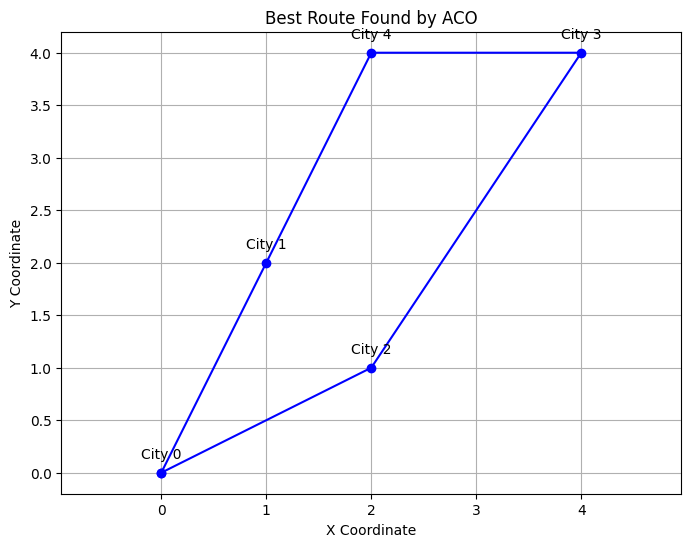

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class AntColony:
    def __init__(self, cities, num_ants=10, alpha=1.0, beta=2.0, rho=0.5, iterations=100):
        self.cities = cities
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.iterations = iterations
        self.num_cities = len(cities)
        self.pheromone = np.ones((self.num_cities, self.num_cities))
        self.distance = self.calculate_distances()

    def calculate_distances(self):
        distances = np.zeros((self.num_cities, self.num_cities))
        for i in range(self.num_cities):
            for j in range(i + 1, self.num_cities):
                distances[i][j] = distances[j][i] = np.linalg.norm(np.array(self.cities[i]) - np.array(self.cities[j]))
        return distances

    def select_next_city(self, current_city, visited):
        probabilities = []
        for next_city in range(self.num_cities):
            if next_city not in visited:
                pheromone = self.pheromone[current_city][next_city] ** self.alpha
                heuristic = (1 / self.distance[current_city][next_city]) ** self.beta
                probabilities.append(pheromone * heuristic)
            else:
                probabilities.append(0)

        total = sum(probabilities)
        probabilities = [p / total for p in probabilities]
        return np.random.choice(range(self.num_cities), p=probabilities)

    def construct_solution(self):
        for _ in range(self.num_ants):
            visited = [0]
            current_city = 0
            for _ in range(1, self.num_cities):
                next_city = self.select_next_city(current_city, visited)
                visited.append(next_city)
                current_city = next_city
            visited.append(0)  # Return to starting city
            yield visited

    def update_pheromones(self, solutions):
        self.pheromone *= (1 - self.rho)  # Evaporation
        for solution in solutions:
            length = self.calculate_tour_length(solution)
            pheromone_deposit = 1 / length
            for i in range(len(solution) - 1):
                self.pheromone[solution[i]][solution[i + 1]] += pheromone_deposit

    def calculate_tour_length(self, solution):
        return sum(self.distance[solution[i]][solution[i + 1]] for i in range(len(solution) - 1))

    def run(self):
        best_solution = None
        best_length = float('inf')

        for _ in range(self.iterations):
            solutions = list(self.construct_solution())
            self.update_pheromones(solutions)

            for solution in solutions:
                length = self.calculate_tour_length(solution)
                if length < best_length:
                    best_length = length
                    best_solution = solution

        return best_solution, best_length

    def plot_route(self, best_route):
        # Plot cities
        x = [self.cities[i][0] for i in best_route]
        y = [self.cities[i][1] for i in best_route]

        plt.figure(figsize=(8, 6))
        plt.plot(x, y, marker='o', linestyle='-', color='b')

        # Annotate cities
        for i, city in enumerate(self.cities):
            plt.annotate(f'City {i}', (city[0], city[1]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.title('Best Route Found by ACO')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid()
        plt.axis('equal')
        plt.show()

# Define the cities as (x, y) coordinates
cities = [(0, 0), (1, 2), (2, 1), (4, 4), (2, 4)]


# Create an Ant Colony optimizer
aco = AntColony(cities)

# Run the ACO algorithm
best_route, best_distance = aco.run()

# Output the best solution
print("Best Route:", best_route)
print("Best Distance:", best_distance)

# Plot the best route
aco.plot_route(best_route)
